<a href="https://colab.research.google.com/github/NMThanh123/AI_Report/blob/main/Report_AI_Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VN banknotes (5000vnd, 10000vnd, 20k, 50k, 100k, 500k)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
def save_data(root_folder):

    dest_size = (224, 224)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    # Lặp qua các thư mục con con trong thư mục gốc
    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            # Lặp qua các file trong từng thư mục con  chứa các ảnh
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    # print("File=", file)
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=(224, 224)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Colab Notebooks/Data_report/pix.data', 'wb')
    # dump information to that file
    pickle.dump((images,labels), file)
    # close the file
    file.close()

save_data('/content/drive/MyDrive/Colab Notebooks/Data_report/data_money')

Bắt đầu xử lý ảnh...
Folder = 10000
Folder = 50000
Folder = 00000
Folder = 20000
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/pix.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(4004, 224, 224, 3)
(4004, 4)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(3203, 224, 224, 3)

In [ ]:

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
h = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=aug.flow(X_test,y_test, batch_size=64))

<ipython-input-9-56387b766325>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=aug.flow(X_test,y_test, batch_size=64))


Epoch 1/10
51/51 [==============================] - 106s 1s/step - loss: 1.1285 - accuracy: 0.4268 - val_loss: 0.3858 - val_accuracy: 0.8002
Epoch 2/10
51/51 [==============================] - 58s 1s/step - loss: 0.4630 - accuracy: 0.8211 - val_loss: 0.3477 - val_accuracy: 0.8390
Epoch 3/10
51/51 [==============================] - 57s 1s/step - loss: 0.2208 - accuracy: 0.9204 - val_loss: 0.1210 - val_accuracy: 0.9576
Epoch 4/10
51/51 [==============================] - 59s 1s/step - loss: 0.0950 - accuracy: 0.9666 - val_loss: 0.0600 - val_accuracy: 0.9838
Epoch 5/10
51/51 [==============================] - 59s 1s/step - loss: 0.0784 - accuracy: 0.9788 - val_loss: 0.0495 - val_accuracy: 0.9838
Epoch 6/10
51/51 [==============================] - 58s 1s/step - loss: 0.0470 - accuracy: 0.9844 - val_loss: 0.0371 - val_accuracy: 0.9950
Epoch 7/10
51/51 [==============================] - 58s 1s/step - loss: 0.0431 - accuracy: 0.9835 - val_loss: 0.0319 - val_accuracy: 0.9950
Epoch 8/10
51/51 [=

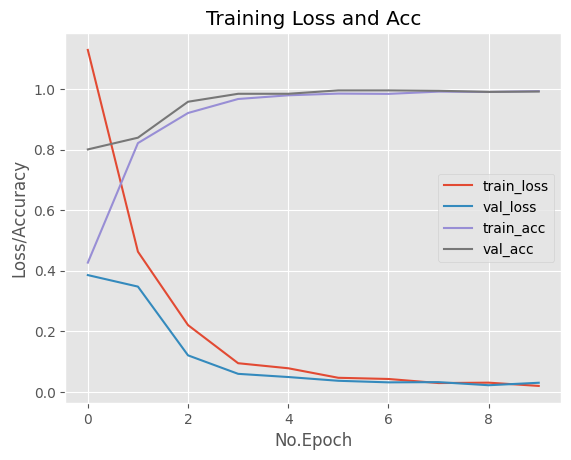

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Acc")
plt.xlabel("No.Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Report/Model_AI/model_money.h5')

In [ ]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/Model_AI/model_money.h5')

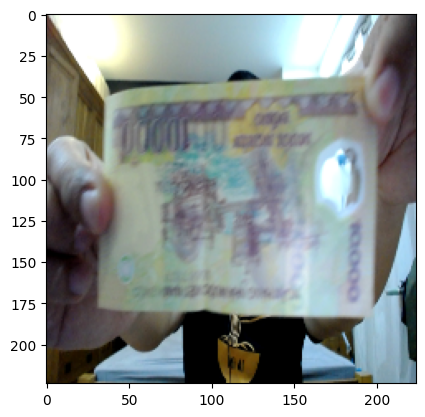

1/1 [==============================] - 0s 28ms/step
[[5.3593865e-12 9.9999964e-01 2.0530055e-11 3.3635578e-07]]
This picture is:  10000 [5.3593865e-12 9.9999964e-01 2.0530055e-11 3.3635578e-07]
0.99999964


In [ ]:
class_name = ['00000','10000','20000','50000']
image = X[324]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[324]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))